# Travail pratique d'apprentissag automatique sur les Réseaux de Neuronnes avec Perceptron (MLP)

### Réalisé par MULAPI TITA Ketsia

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

## 1) Pretraitement

In [4]:
def pretraitement(path):
    with open(path, 'r') as f:
        lines = f.readlines()
    classes=[]
    XList=[]
    YList=[]
    for line in lines:
        line = line.split(" ")
        classes.append(line[0])
        XList.append(line[1])
        YList.append(line[2].replace("\n",""))
    df = pd.DataFrame({"classes":classes,"X":XList,"Y":YList})
    df.info()
    return df

In [46]:
df_app1 = pretraitement("data_tp1_app.txt")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   classes  500 non-null    object
 1   X        500 non-null    object
 2   Y        500 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB


In [171]:
def getClasses(df):
    df.classes = df.classes.astype("int")
    df.X = df.X.astype("float")
    df.Y = df.Y.astype("float")
    return df

In [172]:
df_app1 = getClasses(df_app1)

In [49]:
def fromDFtoArray(df):
    return np.array(df)

 Cette fonction nous permet d'ajouter un biais à notre jeux de données d'apprentissage ou, à notre n'importe quel dataset qui représenterai des valeurs devant passer apr une couche, afin qu'en entrée on puisse avoir 3 caractéristique (x,y,biais) avec biais=1 pour la couche d'entrée et donc, (x,y,...,biais) pour une couche quelconque.

In [78]:
def getDfWithBiais(df):
    position = df.shape[1]
    df.insert(position,"Biais",1)
    return df

## 2)  Fonction d'activation et de transfert : calcul de la sortie obtenue

In [51]:
def noyau_activation(x):
    return 1/(1+np.exp(-x))

In [52]:
def transfert_InputHidenOutput(df_data, df_Weight):
    assert df_data.shape[1] == df_Weight.shape[0]
    Entree = fromDFtoArray(df_data)
    Poids_EH = fromDFtoArray(df_Weight) 
    return np.matmul(Entree,Poids_EH) 

## 3) Détermination du nombre de neuronne en couche caché

- 2 neuronne d'entrée + 5 neuronnes de sorties, le tout divisé par 2

In [53]:
nH = np.ceil((2 + 5) / 2)
nH

4.0

## 4)  Le taux d'apprentissage

In [54]:
µ = 0.1

## 5)  Génération des poids, valeurs comprises entre -0.5 et 0.5

#### - Nombre de poids sans biais

- Nombre de Poids entre la couche d'entrée et la couche cachée

In [55]:
NombredeWeight1 = 2*4
NombredeWeight1

8

2 neuronne en entrée et 4 dans la couche cachée

- Nombre de Poids entre la couche d'entrée et la couche cachée

In [56]:
NombredeWeight2 = 4*5
NombredeWeight2

20

4 neuronnes dans la couche cachée et 5 dans la couche de sortie

##### Nota Bene : Comprenons donc que, ici les biais ne sont pas pris en compte!

#### - Nombre de poids avec biais

- Fonction

In [57]:
def WeightGeneration(n,connexion):
    #
    W = np.linspace(-0.5,0.5,num=n) 
    #
    if connexion==1 :
        Weight_OF_EH = W.reshape((2, 4)) 
        BiaisW = np.linspace(-0.4,0.5,num=4)
        B = BiaisW.reshape((1,4))
    else :
        Weight_OF_EH = W.reshape((4, 5)) 
        BiaisW = np.linspace(-0.4,0.5,num=5)
        B = BiaisW.reshape((1,5))
    #
    TabOfWeight = np.concatenate((Weight_OF_EH,B),axis=0)
    #    
    W_df = pd.DataFrame(TabOfWeight)
    print(W_df)
    return W_df

Nota Bene : si la Connexion=1, cela représente les premières connexions, c'ets à dire, celle entre la couche d'entrée et la cocuhe cahcée. Sinon ce sont les autres, dont notamment la 2e partie des connexions, celle entre la couche cachée et la couche de sortie.

- Pour 6 neuronnes dont 2 en entrée et 4 dans la couche caché on doit avoir 12 poids avec ceux associés aux biais y compris. on notera ce pendant qu'il ne doit pas exister  de liaison entre le bais de la couche d'entrée et celui de sortie, cette laision est nulle, nous ferons alors en sorte que ce dernier ne soit pas considéré dans nos cacluls!

Algo : Et donc pour les générer on prendre les 8 connexions (2 * 4) entre les neuronnes + les 4 autres connexion qui nous emmène à 12 (ces 4 autres sont complétés dans la fonction WeightGeneration).

In [58]:
W_E_H = WeightGeneration(8,1)

          0         1         2         3
0 -0.500000 -0.357143 -0.214286 -0.071429
1  0.071429  0.214286  0.357143  0.500000
2 -0.400000 -0.100000  0.200000  0.500000


Entre la couche d'entrée et la couche cachée on retrouve alors Nos 12 poids.

- Pour 9 neuronnes dont 4 dans la couche cachée et 5 dans la couche de sortie et 1 biais dans la couche cachée, on doit avoir 25 poids ! en raisons de 20 poids entre les neuronnes et 5 poids supplémentaires entre le bais et la couche de sortie.

In [59]:
W_H_S = WeightGeneration(20,2)

          0         1         2         3         4
0 -0.500000 -0.447368 -0.394737 -0.342105 -0.289474
1 -0.236842 -0.184211 -0.131579 -0.078947 -0.026316
2  0.026316  0.078947  0.131579  0.184211  0.236842
3  0.289474  0.342105  0.394737  0.447368  0.500000
4 -0.400000 -0.175000  0.050000  0.275000  0.500000


Enfin entre la couche cachée et la couche d'entrée, on retrouve nos 25 poids.

##### Nota Bene : Comprenons donc que, ici les biais sont pris en compte, et c'est ce que nous allons utiliser. Le biais rappelons le, permet d'une manière ou d'une autre d'ajuster la froitère de décision qu'est l'hyperplan, d'où pour des donnés ou des cas pas facilement séparables au premier coup on sera dans l'obligation d'uiliser des bais afin de trouver le meilleur hyper plan.

# 🔽 Partie Chaînage avant

## 6)  La couche d'entrée-cachée

In [60]:
def InputLayer(df):
    return AddBiaisInDF(df)

In [61]:
print("dimension Entrée-Cachée : "+str(W_E_H.shape)," et dimension données app : "+str(df_app1.shape))

dimension Entrée-Cachée : (3, 4)  et dimension données app : (500, 3)


la première colonne étant celle des classes, nous allons la conserver de coté

In [80]:
df_classes_app = df_app1.iloc[:,0]

In [81]:
df_classes_app

0      1
1      1
2      1
3      1
4      1
      ..
495    5
496    5
497    5
498    5
499    5
Name: classes, Length: 500, dtype: int64

Nous pouvons alors la récupérer dans un nouveau dataframe les coordonnées x et y puis ensuite ajouter à chaque point le biais=1.

- Récupération des X et des Y

In [82]:
data_app = df_app1.iloc[:,1:3]

In [83]:
data_app

,X,Y
0,-6.315382,6.344938
1,-4.943573,7.821684
2,-8.920876,2.705258
3,-5.661533,7.425065
4,-5.918269,5.697313
...,...,...
495,-1.446325,-0.422072
496,0.261599,0.479059
497,-2.243814,-0.673345
498,-0.489892,0.282347


- Ajout des biais

In [84]:
data_app.shape

(500, 2)

In [85]:
data_app = getDfWithBiais(data_app)
data_app

,X,Y,Biais
0,-6.315382,6.344938,1
1,-4.943573,7.821684,1
2,-8.920876,2.705258,1
3,-5.661533,7.425065,1
4,-5.918269,5.697313,1
...,...,...,...
495,-1.446325,-0.422072,1
496,0.261599,0.479059,1
497,-2.243814,-0.673345,1
498,-0.489892,0.282347,1


- On vérifie si les conditions de dimension pour la multiplication matricielle sont respécté par les 2 dataframe Data et Poids :

In [86]:
data_app.shape[1] == W_E_H.shape[0]

True

- On obtient alors, la somme pondérée des valeurs en entrée par les poids.

In [87]:
data = transfert_InputHidenOutput(data_app, W_E_H)
data

array([[ 3.21090086,  3.51512314,  3.81934543,  4.12356771],
       [ 2.63047821,  3.34163693,  4.05279564,  4.76395436],
       [ 4.25367071,  3.66572529,  3.07777986,  2.48983443],
       ...,
       [ 0.67381093,  0.55707393,  0.44033693,  0.32359993],
       [-0.13488636,  0.13546436,  0.40581507,  0.67616579],
       [-0.55337507, -0.20562807,  0.14211893,  0.48986593]])

chaque ligne ici est le résultat obtenu à partir d'un point (une entrée) et, chaque valeur dans une ligne est la somme pondérée obtenue sur un neuronne, il ne s'agit donc pas de la valeur obtenue après activation du neuronne, c'est ce que nosu faisons dans la suite. 

- On utilise alors la fonction d'activation pour chaque neuronne afin de determiner les valeurs de la couche cachée

In [88]:
def get_HiddenLayer(data):
    dim = data.shape
    # On active les neuronnes
    for i in range(dim[0]):
        for j in range(dim[1]):
            data[i,j]=noyau_activation(data[i,j])
    # On ajoute une colonne bias
    Biais = np.linspace(1,1,num=dim[0])
    Biais = Biais.reshape((dim[0],1))
    #
    data = np.concatenate((data,Biais),axis=1)
    # nous retournons les valeurs de chaque neuronnes, après activation, pour chaque point
    return data 

In [89]:
HiddenLayer = get_HiddenLayer(data)
HiddenLayer

array([[0.96124244, 0.97111502, 0.97852896, 0.98407117, 1.        ],
       [0.93279753, 0.96582991, 0.98292296, 0.99154037, 1.        ],
       [0.98598718, 0.97505268, 0.95596682, 0.9234261 , 1.        ],
       ...,
       [0.66235596, 0.63577523, 0.60833931, 0.58020133, 1.        ],
       [0.46632945, 0.5338144 , 0.60008399, 0.6628824 , 1.        ],
       [0.36508172, 0.44877336, 0.53547005, 0.62007485, 1.        ]])

Voici que nous avons pu obtenir notre couche cachée, passant à présent au calcul de l'erreur local, tout juste avant de passer à la deuxième partie de ce travail sur la couche cachée-sortie.

## 8) La couche cachée-sortie

In [90]:
W_H_S.shape

(5, 5)

In [91]:
HiddenLayer.shape

(500, 5)

In [92]:
HiddenLayer.shape[1] == W_H_S.shape[0]

True

là encore nous sommes rassuré que le produit matriciel passera.

Donc on fait pareil, masi cette fois-ci avec nos deux dernières matrices de la cocuhe cachée et du poids respectivement : HiddenLayer, W_H_S

In [93]:
def get_Predict_OutPutLayer(data):
    dim = data.shape
    # On active les neuronnes
    for i in range(dim[0]):
        for j in range(dim[1]):
            data[i,j]=noyau_activation(data[i,j])
    # nous retournons les classifications de chaque points, après activation pour chaque point
    return data 

In [94]:
data = transfert_InputHidenOutput(HiddenLayer, W_H_S)
predictions = get_Predict_OutPutLayer(data)
predictions

array([[0.31002366, 0.40853839, 0.51499222, 0.62010281, 0.71503852],
       [0.31383372, 0.41255579, 0.51885032, 0.62346554, 0.71771003],
       [0.30333591, 0.40027138, 0.50569814, 0.61062059, 0.70621046],
       ...,
       [0.33230142, 0.41534391, 0.50349008, 0.59141984, 0.67386436],
       [0.36542005, 0.44823497, 0.53402393, 0.61784644, 0.69519677],
       [0.37865932, 0.45844855, 0.54042722, 0.62027492, 0.69410215]])

On constate que l'on a pas les valeurs de sorties tel qu'on les attend par exemple, le premier point (la première ligne) est sensée nous donner 1 à la première valeur et 0 ailleurs. Et pourtant ici, on peut bien remarquer que nous avons d'autre valeurs. appliquons dans la suite le chaînage arrière en évaluant les erreurs.

# 🔽 Partie Chaînage arrière

## 7) Evaluations

##  * CLassification

In [95]:
def ConfigurationDesCLasses(sorties_attendues):
    n = len(sorties_attendues)
    outputValue = np.zeros((n,5))
    start = 0
    stop = 100
    for i in range(5):
        for j in range(start,stop):
            for k in range(5):
                if(sorties_attendues[j]-1==k):
                    outputValue[j,k] = 1 
        start += 100
        stop += 100
    return outputValue

In [96]:
realite = ConfigurationDesCLasses(df_classes_app)
realite

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

## * taux de bonne performance

In [185]:
def accuracy_evaluation(realite, predits):
    assert realite.shape == predits.shape
    dim = realite.shape
    bon = 0
    for i in range(dim[0]):
        for j in range(dim[1]):
            if (realite[i,j]==1 and realite[i,j] == predits[i,j]):
                bon += 1
    score = (bon * 100.0) / dim[0]
    print("le taux de performance est de : ",score," %")
    return score

### * Récupération des point mal classés

In [167]:
def recup_point_mal_et_bien(realite, predits,dataset):
    assert realite.shape == predits.shape
    dim = realite.shape
    bad = pd.DataFrame()
    good = pd.DataFrame()
    for i in range(dim[0]):
        for j in range(dim[1]):
            if (realite[i,j]==1 and realite[i,j] != predits[i,j]) :
                bad.iloc[i,j]=dataset.iloc[i,j]
    for i in range(dim[0]):
        for j in range(dim[1]):
            if (realite[i,j]==1 and realite[i,j] == predits[i,j]) :
                good.iloc[i,j]=dataset.iloc[i,j]
    return bad, good

## * Les erreurs

### - Erreur en sortie

Formule :

( get_Predict_OutPutLayer - Output_desire) * ( get_Predict_OutPutLayer * ( 1 - get_Predict_OutPutLayer ) )

on lire : ( sortie obtenue - sortie désirée ) * ( sortie obtenue * (1 - sortie obtenue) )

In [98]:
Output_Error = ( predictions - realite ) * ( predictions * ( 1 - predictions ) )
Output_Error

array([[-0.14759214,  0.09871708,  0.1286323 ,  0.14608091,  0.14569513],
       [-0.1477605 ,  0.09998434,  0.12952822,  0.14636244,  0.14540973],
       [-0.14722131,  0.09608683,  0.12640812,  0.14518304,  0.1465226 ],
       ...,
       [ 0.07373011,  0.10085935,  0.12586639,  0.14291212, -0.07167522],
       [ 0.08473661,  0.11085765,  0.13288778,  0.14588109, -0.06458726],
       [ 0.08908962,  0.11382062,  0.13422355,  0.1460958 , -0.06494956]])

### Et si on trichait ? Utilisons Une règle de décision : "fonction marche de Heaviside"

    S(Nsortie) = 1 si Erreur_Nsortie < 0

    S(Nsortie) = 0 sinon (Erreur_Nsortie >= 0)

In [99]:
def heavside(OutputError):
    dim = OutputError.shape
    for i in range(dim[0]):
        for j in range(dim[1]):
            if(OutputError[i,j]<0):
                OutputError[i,j] = 1
            else :
                OutputError[i,j] = 0
        output = OutputError
    return output

In [100]:
predits = heavside(Output_Error)
predits

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [101]:
for i in range(500):
        print(predits[i,:])

[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0

In [102]:
accuracy_evaluation(realite, predits)

('le taux de performance est de : ', 100.0, ' %')

Ceci me pousse à affirmer que les réseaux de neuronnes sur apprennent, en effet, autant nos données du dataset 1 sont très bien linéairement séparable, autant la recherche d'un hyperplan idéal est loins d'être fastidieux et donc, si pour chaque valeur obtenue en prédiction, on rejoins le score de 100% cela revient à dire qu'il n'ya pas eu d'erreurs, ce pendant, dans le cas contraire, on aurait fait une modification des poids, pour chaque points mal classés.

## * Modification des poids

In [104]:
def Weight_update(MatricePoids, µ, Erreur, NeuronneValue):
    dim = MatricePoids.shape
    New_poids = np.zeros((dim[0],dim[1]))
    Err_V = Erreur*NeuronneValue # liste des points mal classé
    New_poids = []
    for i in range(Err_V.shape[0]): # pour chaque point mal classé
        for j in range(dim[0]):
            for k in range(dim[1]):
                MatricePoids[k,j] = MatricePoids[k,j]-(µ*Err_V[i,k])
        New_poids.append(MatricePoids)
    return MatricePoids

### - Erreur dans cachée

Formule :

( Somme( Output_Error  * Poids_OutputLayer(i,k) ) * HiddenLayer(i) * ( 1 - HiddenLayer(i) )

on lire : ( Erreurs_des_sorties_obtenues * Poids_Entre_CoucheCachee_Sortie ) * ( NeuronneCache(i) * (1 - NeuronneCache(i) ) )

In [107]:
Hidden_Error = ( Output_Error@W_H_S ) * ( HiddenLayer * ( 1 - HiddenLayer ) )

### - Erreur en entrée

Formule :

( Somme( Hidden_Error  * Poids_HiddenLayer(i,k-1) ) * InputLayer(i) * ( 1 - InputLayer(i) )

on lire : ( Erreurs_a_l_entree * Poids_Entre_CoucheCachee_Input ) * ( NeuronneInput(i) * (1 - NeuronneInput(i) ) )

In [126]:
 Hidden_Error_Without_Biais = Hidden_Error.iloc[:,:4]

In [158]:
Input_Error = Hidden_Error_Without_Biais@W_E_H.T

### - Erreur Global

In [161]:
# (1/2), sur 2 en raison de 2 entrées
Global_err = (1/2)*sum(sum(Output_Error - realite ))**(2)

## Dessinner un réseeau de neuronne : 

### Pour cette fonction, Je me suis basée sur ce que propose _Brandon Amos, AI Engineer chez Facebook_

In [213]:
import matplotlib.pyplot as plt

def dessiner_un_reseau(ax, left, right, bottom, top, layer_sizes):
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

## # 🔽 Partie Algorihme MLP : Testons notre Réseau de neuronnes, en faisant appel aux fonctions prédéfiniement utilisé ainsi que les derniers poids et, obtenues à l'aide de nos données d'apprentissage et, qui nous ont permis d'obtenir une meilleure démarche

In [226]:
def MLP(Data, PoidsIH, PoidsHS, µ):

    # ----- présentation de l'architecture ----- #
    entree = Data.shape[1]-1
    cachee = np.ceil((Data.shape[1]-1 + len(Data["classes"].unique()) / 2))
    sortie = len(Data["classes"].unique())
    print("1) Nous avons dans la couche d'entrée ",entree," neuronne.s, \n2) dans la couche cachée ",cachee," neuronne.s et, \n3)",sortie," neuronne.s dans la couche de sortie")
    
    
    # ----- pretraitement ----- #
    df_classes_app = df_app1.iloc[:,0]
    data_app = df_app1.iloc[:,1:df_app1.shape[1]]
    data_app = getDfWithBiais(data_app)
          
    # ----- chaînage_avant ----- #
    data = transfert_InputHidenOutput(data_app, PoidsIH)
    HiddenLayer = get_HiddenLayer(data)
    data = transfert_InputHidenOutput(HiddenLayer, PoidsHS)
    predictions = get_Predict_OutPutLayer(data)
    realite = ConfigurationDesCLasses(df_classes_app)
    err = (predictions - realite)*(predictions*(1-predictions))
    predits = heavside(err)
    print("\n")
    score = accuracy_evaluation(realite, predits)
          
    while(score!=100):

        # ----- chaînage_arriere : descente de gradient ----- #
        Hidden_Error = ( err@W_H_S ) * ( HiddenLayer * ( 1 - HiddenLayer ) )
        points_mal_classee, points_bien_classe = recup_point_mal_et_bien(realite, predits, data)
        New_Poids_HS = Weight_update(PoidsHS, µ, Hidden_Error, HiddenLayer)
          
        Hidden_Error_Without_Biais = Hidden_Error.iloc[:,:4]
        Input_Error = Hidden_Error_Without_Biais@PoidsIH.T
        New_Poids_IH = Weight_update(PoidsIH, µ, Input_Error, data)
          
        # on reprend l'algo avec avec les nouveaux poids et les points mal classés
          
        # ----- chaînage_avant ----- #
        data = transfert_InputHidenOutput(points_mal_classe, New_Poids_IH)
        HiddenLayer = get_HiddenLayer(data)
        data = transfert_InputHidenOutput(HiddenLayer, New_Poids_HS)
        predictions = get_Predict_OutPutLayer(data)
          
        # Concatenation des points bien et mal classé pour revérification du score
        data = np.concatenate((points_mal_classee, points_bien_classe),axis=0)          
        err = (predictions - realite)*(predictions*(1-predictions))
        predits = heavside(err)
        score = accuracy_evaluation(realite, predits)
        
    print("\n Voici à quoi ressemble notre réseau (sans les biais visible !!! )")
    fig = plt.figure(figsize=(12, 12))
    ax = fig.gca()
    ax.axis('off')
    dessiner_un_reseau(ax, .1, .9, .1, .9, [int(entree), int(cachee), int(sortie)])
    fig.show()

# 🔽 Partie Test

In [174]:
df_dec1 = pretraitement("data_tp1_dec.txt")
df_dec1 = getClasses(df_dec1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   classes  500 non-null    object
 1   X        500 non-null    object
 2   Y        500 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB


1) Nous avons dans la couche d'entrée  2  neuronne.s, 
2) dans la couche cachée  5.0  neuronne.s et, 
3) 5  neuronne.s dans la couche de sortie


le taux de performance est de :  100.0  %

 Voici à quoi ressemble notre réseau (sans les biais visible !!! )


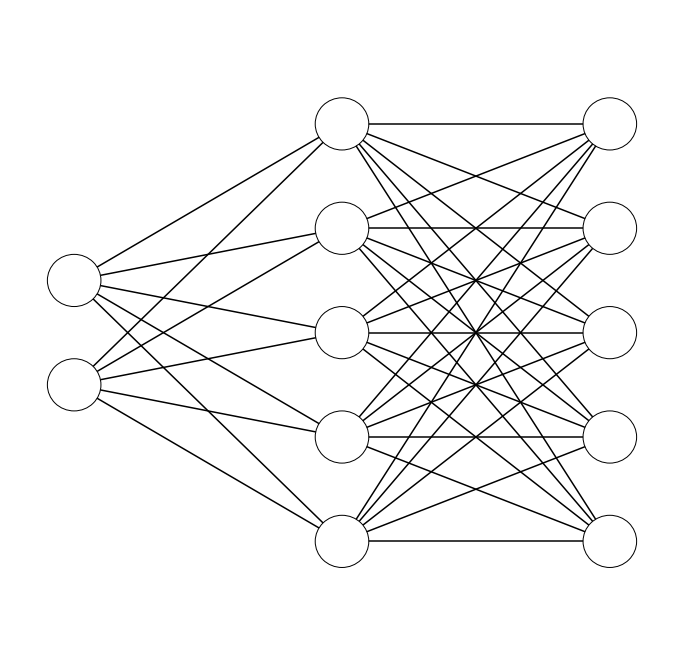

In [227]:
MLP(df_dec1, W_E_H, W_H_S, µ)